In [9]:
from python.optimization import TopOpt
from python.postprocessor import PostProcessor

ANSYS_path = "C:\\Program Files\\ANSYS Inc\\v202\\ansys\\bin\\winx64\\MAPDL.exe"
script_dir = "D:\\SOMP_Ansys\\python\\"
res_dir    = "D:\\SOMP_Ansys\\results\\"
mod_dir    = "D:\\SOMP_Ansys\\models\\"
TopOpt.load_paths(ANSYS_path, script_dir, res_dir, mod_dir)
# TopOpt.set_processors(2)

# Base
- MBB 30 mm x 15 mm (10 N force)
- 30 x 15 mesh
- Cellulose and 0.5 bamboo
- volfrac = 0.3
- rmin = 1.5
- theta0 = -73.6°

In [10]:
# fiber: bamboo
rhofiber  = 700e-12 # t/mm^3
Efiber    = 17.5e3 # MPa
vfiber    = 0.04
CO2fiber  = 1.0565 # kgCO2/kg

# matrix: cellulose
rhomatrix = 990e-12 # t/mm^3
Ematrix   = 3.25e3
vmatrix   = 0.355 # MPa
CO2matrix = 3.8 # kgCO2/kg

Vfiber  = 0.5
Vmatrix = 1-Vfiber

Gfiber  = Efiber/(2*(1+vfiber))
Gmatrix = Ematrix/(2*(1+vmatrix))

Ex  = Efiber*Vfiber + Ematrix*Vmatrix
Ey  = Efiber*Ematrix / (Efiber*Vmatrix + Ematrix*Vfiber)
Gxy = Gfiber*Gmatrix / (Gfiber*Vmatrix + Gmatrix*Vfiber)
nu  = vfiber*Vfiber + vmatrix*Vmatrix
rho = rhofiber*Vfiber + rhomatrix*Vmatrix

In [11]:
solver1 = TopOpt(inputfile='mbb30_15', Ex=Ex, Ey=Ey, Gxy=Gxy, nu=nu, volfrac=0.3, rmin=1.5, theta0=-73.6)
solver1.optim()

print('\nElapsed time: {:.2f}s'.format(solver1.time))

Starting iteration   1... compliance = 0.2925
Starting iteration   2... compliance = 0.2147
Starting iteration   3... compliance = 0.1630
Starting iteration   4... compliance = 0.1371
Starting iteration   5... compliance = 0.1204
Starting iteration   6... compliance = 0.1078
Starting iteration   7... compliance = 0.0975
Starting iteration   8... compliance = 0.0884
Starting iteration   9... compliance = 0.0831
Starting iteration  10... compliance = 0.0774
Starting iteration  11... compliance = 0.0680
Starting iteration  12... compliance = 0.0640
Starting iteration  13... compliance = 0.0609
Starting iteration  14... compliance = 0.0567
Starting iteration  15... compliance = 0.0548
Starting iteration  16... compliance = 0.0529
Starting iteration  17... compliance = 0.0482
Starting iteration  18... compliance = 0.0462
Starting iteration  19... compliance = 0.0496
Starting iteration  20... compliance = 0.0576
Starting iteration  21... compliance = 0.0571
Starting iteration  22... complian

CO2 footprint: 11.24 kgCO2


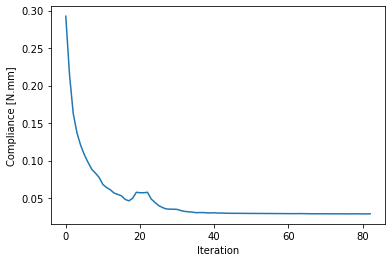

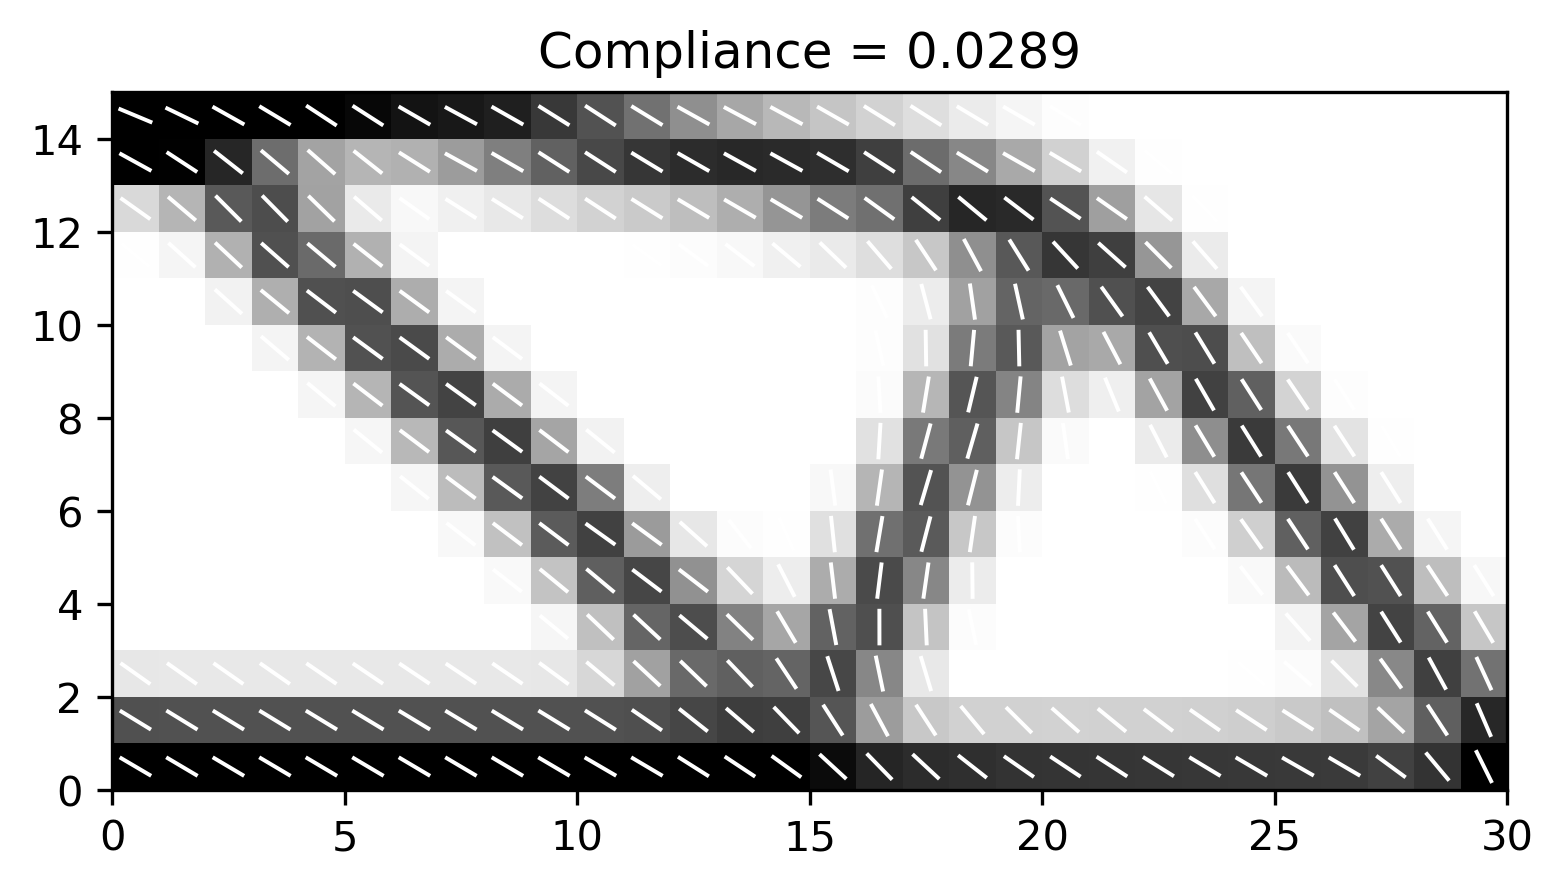

In [12]:
post1 = PostProcessor(solver1)
post1.plot_convergence()
post1.plot()

CO2mat = (rhofiber*Vfiber*CO2fiber + rhomatrix*Vmatrix*CO2matrix)/rho # kgCO2/kg
CO2veh = 1030 * 25 * 3.83 # kg_fuel/kg_transported/year * years * kgCO2/kg_fuel = kgCO2/kg
print('CO2 footprint: {:.2f} kgCO2'.format(1000 * post1.CO2_footprint(rho, CO2mat, CO2veh)))

# Initial angle dependence
- MBB 30 mm x 15 mm
- 30 x 15 mesh
- Cellulose and 0.5 bamboo
- volfrac = 0.3
- rmin = 1.5
- theta0 = -40.9°

In [13]:
solver2 = TopOpt(inputfile='mbb30_15', Ex=Ex, Ey=Ey, Gxy=Gxy, nu=nu, volfrac=0.3, rmin=1.5, theta0=-40.9)
solver2.optim()

print('\nElapsed time: {:.2f}s'.format(solver2.time))

Starting iteration   1... compliance = 0.2662
Starting iteration   2... compliance = 0.1826
Starting iteration   3... compliance = 0.1313
Starting iteration   4... compliance = 0.1070
Starting iteration   5... compliance = 0.0942
Starting iteration   6... compliance = 0.0850
Starting iteration   7... compliance = 0.0782
Starting iteration   8... compliance = 0.0721
Starting iteration   9... compliance = 0.0676
Starting iteration  10... compliance = 0.0610
Starting iteration  11... compliance = 0.0573
Starting iteration  12... compliance = 0.0515
Starting iteration  13... compliance = 0.0515
Starting iteration  14... compliance = 0.0484
Starting iteration  15... compliance = 0.0450
Starting iteration  16... compliance = 0.0465
Starting iteration  17... compliance = 0.0437
Starting iteration  18... compliance = 0.0414
Starting iteration  19... compliance = 0.0421
Starting iteration  20... compliance = 0.0394
Starting iteration  21... compliance = 0.0421
Starting iteration  22... complian

CO2 footprint: 11.20 kgCO2


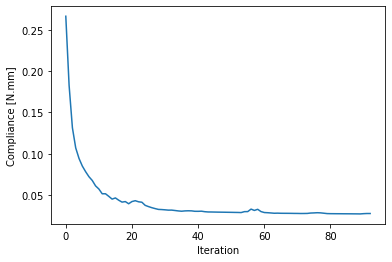

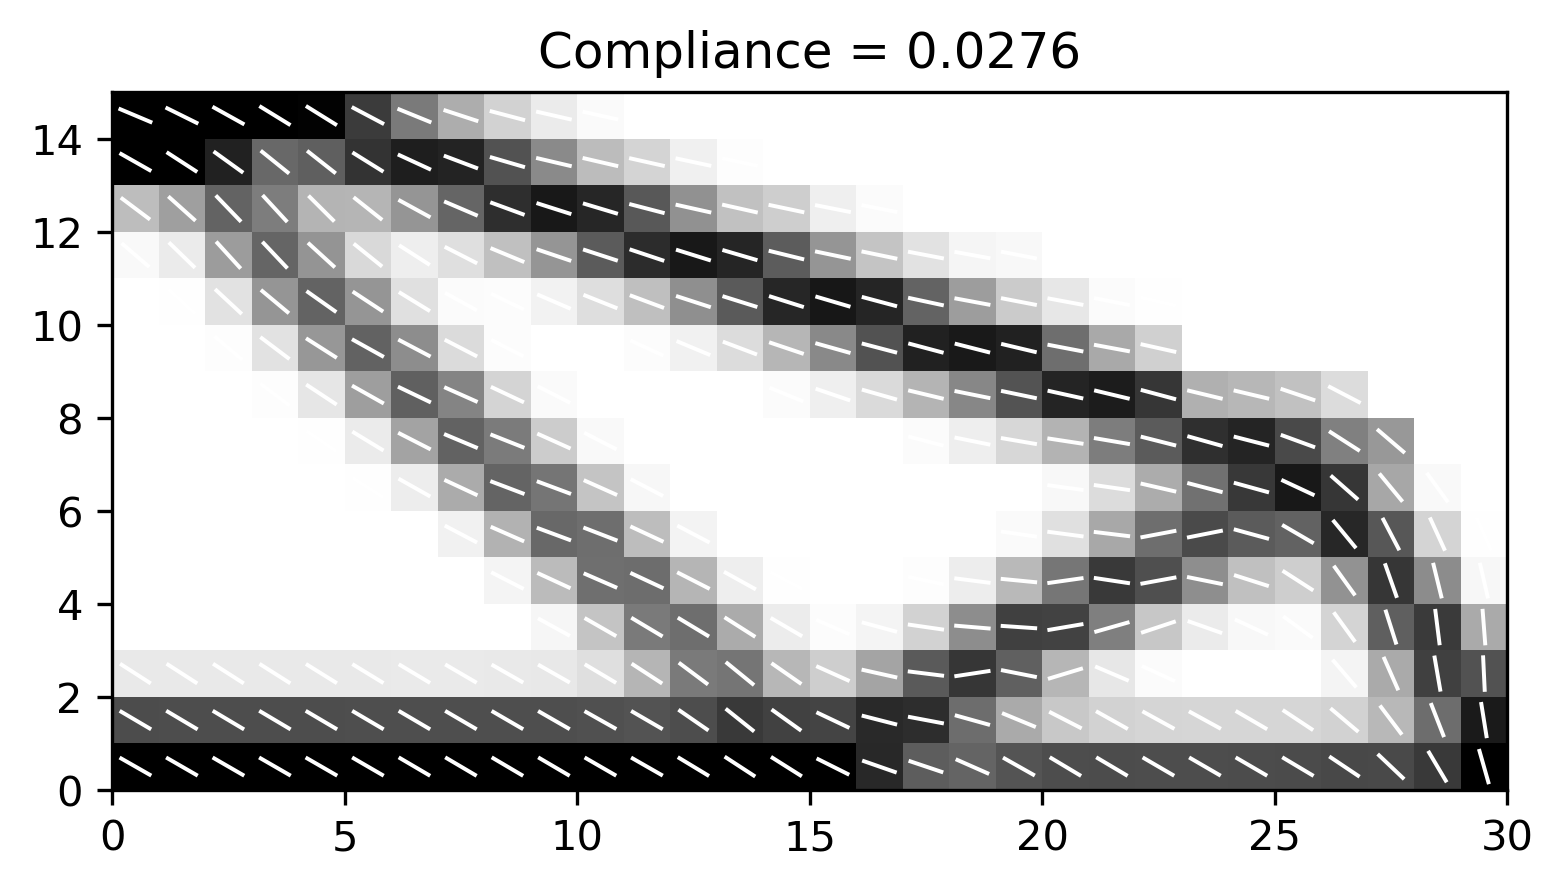

In [14]:
post2 = PostProcessor(solver2)
post2.plot_convergence()
post2.plot()

print('CO2 footprint: {:.2f} kgCO2'.format(1000 * post2.CO2_footprint(rho, CO2mat, CO2veh)))

# Mesh independence
- MBB 30 mm x 15 mm
- 60 x 30 mesh
- Cellulose and 0.5 bamboo
- volfrac = 0.3
- rmin = 1.5
- theta0 = -73.6°

In [15]:
solver3 = TopOpt(inputfile='mbb60_30', Ex=Ex, Ey=Ey, Gxy=Gxy, nu=nu, volfrac=0.3, rmin=1.5, theta0=-73.6)
solver3.optim()

print('\nElapsed time: {:.2f}s'.format(solver3.time))

Starting iteration   1... compliance = 0.3032
Starting iteration   2... compliance = 0.2187
Starting iteration   3... compliance = 0.1655
Starting iteration   4... compliance = 0.1390
Starting iteration   5... compliance = 0.1218
Starting iteration   6... compliance = 0.1088
Starting iteration   7... compliance = 0.0984
Starting iteration   8... compliance = 0.0903
Starting iteration   9... compliance = 0.0838
Starting iteration  10... compliance = 0.0774
Starting iteration  11... compliance = 0.0714
Starting iteration  12... compliance = 0.0666
Starting iteration  13... compliance = 0.0648
Starting iteration  14... compliance = 0.0608
Starting iteration  15... compliance = 0.0591
Starting iteration  16... compliance = 0.0577
Starting iteration  17... compliance = 0.0562
Starting iteration  18... compliance = 0.0551
Starting iteration  19... compliance = 0.0535
Starting iteration  20... compliance = 0.0579
Starting iteration  21... compliance = 0.0532
Starting iteration  22... complian

CO2 footprint: 11.25 kgCO2


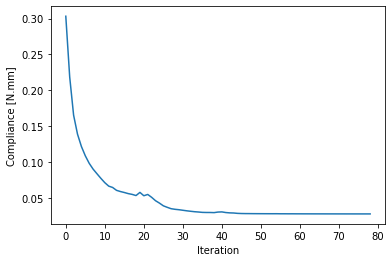

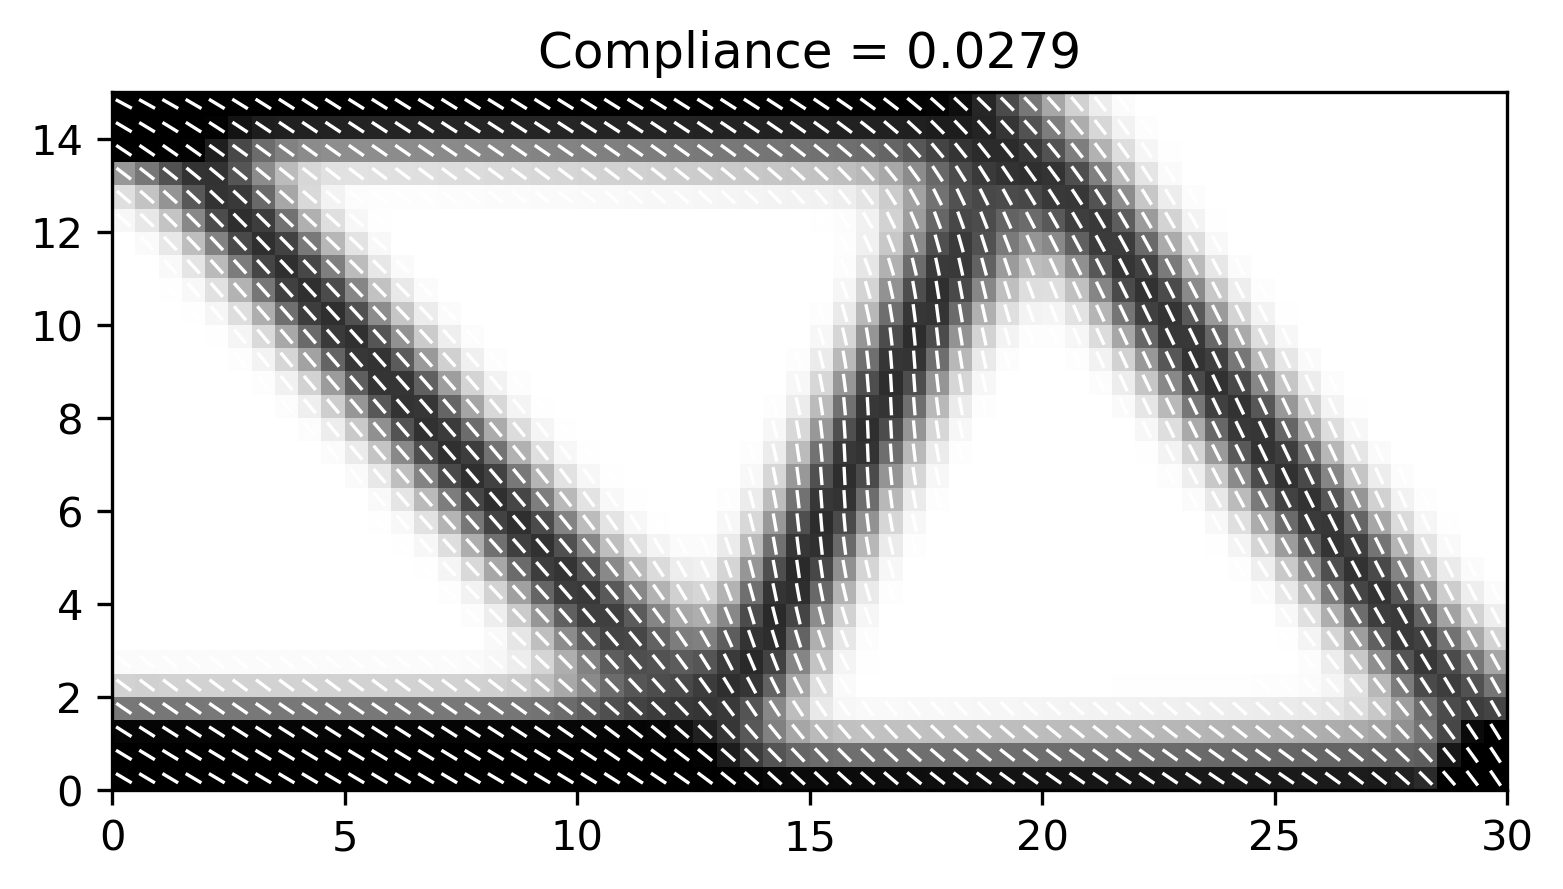

In [16]:
post3 = PostProcessor(solver3)
post3.plot_convergence()
post3.plot()

print('CO2 footprint: {:.2f} kgCO2'.format(1000 * post3.CO2_footprint(rho, CO2mat, CO2veh)))

# Filter radius dependence
- MBB 30 mm x 15 mm
- 120 x 60 mesh
- Cellulose and 0.5 bamboo
- volfrac = 0.3
- rmin = 0.5
- theta0 = -73.6°

In [17]:
solver4 = TopOpt(inputfile='mbb120_60', Ex=Ex, Ey=Ey, Gxy=Gxy, nu=nu, volfrac=0.3, rmin=0.5, theta0=-73.6)
solver4.optim()

print('\nElapsed time: {:.2f}s'.format(solver4.time))

Starting iteration   1... compliance = 0.3135
Starting iteration   2... compliance = 0.2212
Starting iteration   3... compliance = 0.1669
Starting iteration   4... compliance = 0.1394
Starting iteration   5... compliance = 0.1214
Starting iteration   6... compliance = 0.1077
Starting iteration   7... compliance = 0.0967
Starting iteration   8... compliance = 0.0878
Starting iteration   9... compliance = 0.0802
Starting iteration  10... compliance = 0.0735
Starting iteration  11... compliance = 0.0675
Starting iteration  12... compliance = 0.0626
Starting iteration  13... compliance = 0.0587
Starting iteration  14... compliance = 0.0554
Starting iteration  15... compliance = 0.0526
Starting iteration  16... compliance = 0.0495
Starting iteration  17... compliance = 0.0460
Starting iteration  18... compliance = 0.0421
Starting iteration  19... compliance = 0.0377
Starting iteration  20... compliance = 0.0322
Starting iteration  21... compliance = 0.0278
Starting iteration  22... complian

Starting iteration 179... compliance = 0.0198
Starting iteration 180... compliance = 0.0198

Elapsed time: 2321.95s


CO2 footprint: 11.25 kgCO2


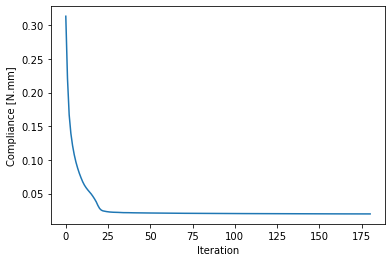

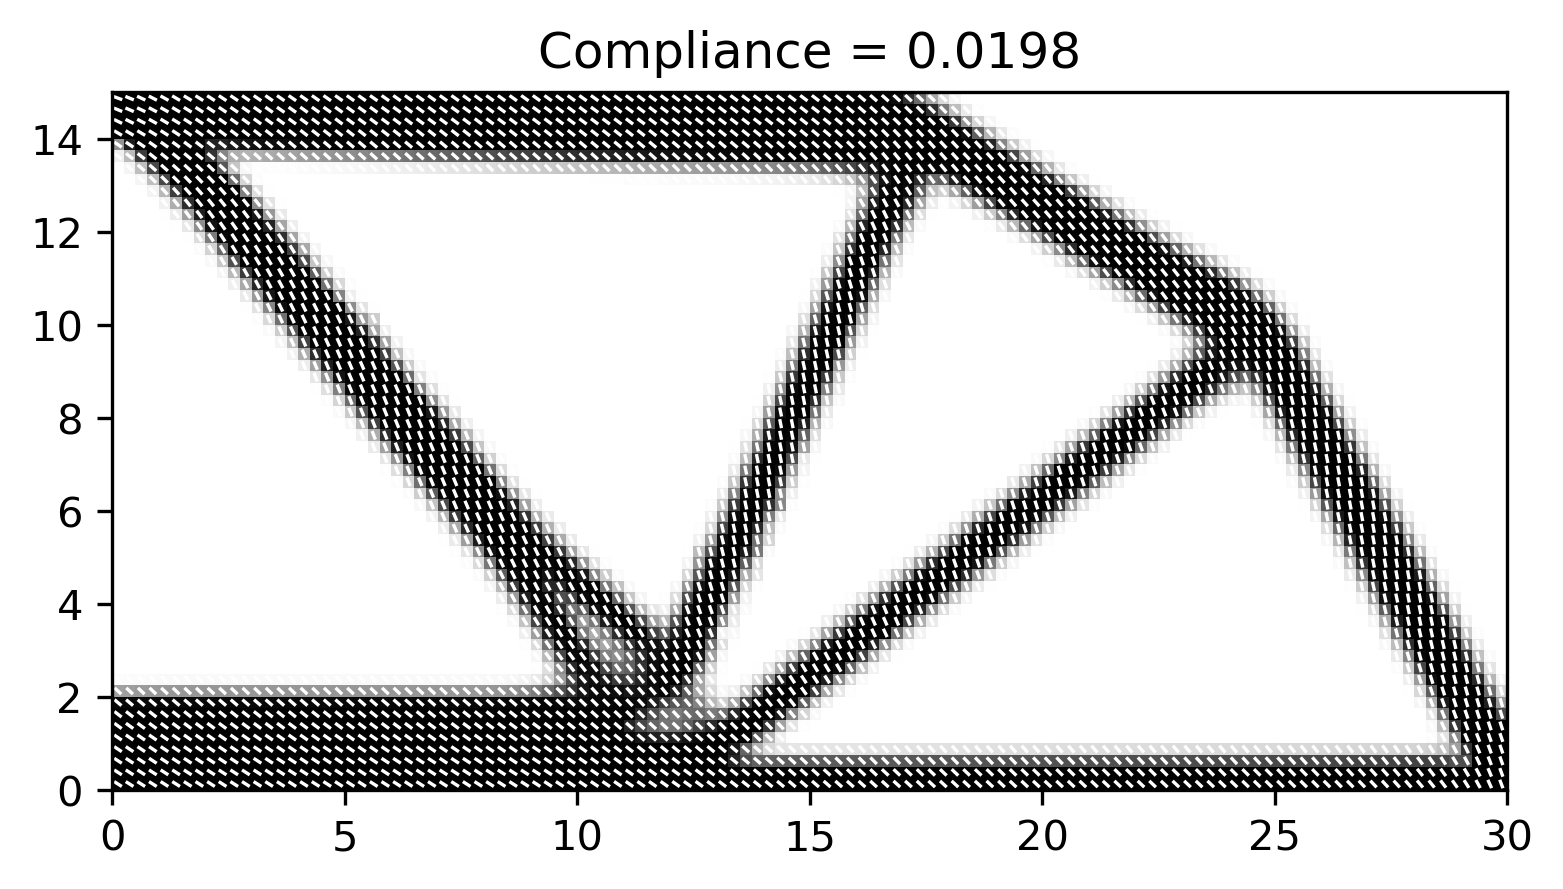

In [18]:
post4 = PostProcessor(solver4)
post4.plot_convergence()
post4.plot()

print('CO2 footprint: {:.2f} kgCO2'.format(1000 * post4.CO2_footprint(rho, CO2mat, CO2veh)))

# Change volfrac
- MBB 30 mm x 15 mm
- 30 x 15 mesh
- Cellulose and 0.5 bamboo
- volfrac = 0.2
- rmin = 1.5
- theta0 = -73.6°

In [19]:
solver5 = TopOpt(inputfile='mbb30_15', Ex=Ex, Ey=Ey, Gxy=Gxy, nu=nu, volfrac=0.2, rmin=1.5, theta0=-73.6)
solver5.optim()

print('\nElapsed time: {:.2f}s'.format(solver5.time))

Starting iteration   1... compliance = 0.9873
Starting iteration   2... compliance = 0.6810
Starting iteration   3... compliance = 0.4812
Starting iteration   4... compliance = 0.4022
Starting iteration   5... compliance = 0.3527
Starting iteration   6... compliance = 0.3204
Starting iteration   7... compliance = 0.2946
Starting iteration   8... compliance = 0.2687
Starting iteration   9... compliance = 0.2518
Starting iteration  10... compliance = 0.2318
Starting iteration  11... compliance = 0.2158
Starting iteration  12... compliance = 0.1980
Starting iteration  13... compliance = 0.1740
Starting iteration  14... compliance = 0.1606
Starting iteration  15... compliance = 0.1836
Starting iteration  16... compliance = 0.1780
Starting iteration  17... compliance = 0.2280
Starting iteration  18... compliance = 0.3841
Starting iteration  19... compliance = 0.3947
Starting iteration  20... compliance = 0.2624
Starting iteration  21... compliance = 0.1883
Starting iteration  22... complian

CO2 footprint: 7.48 kgCO2


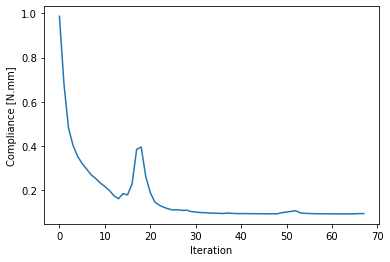

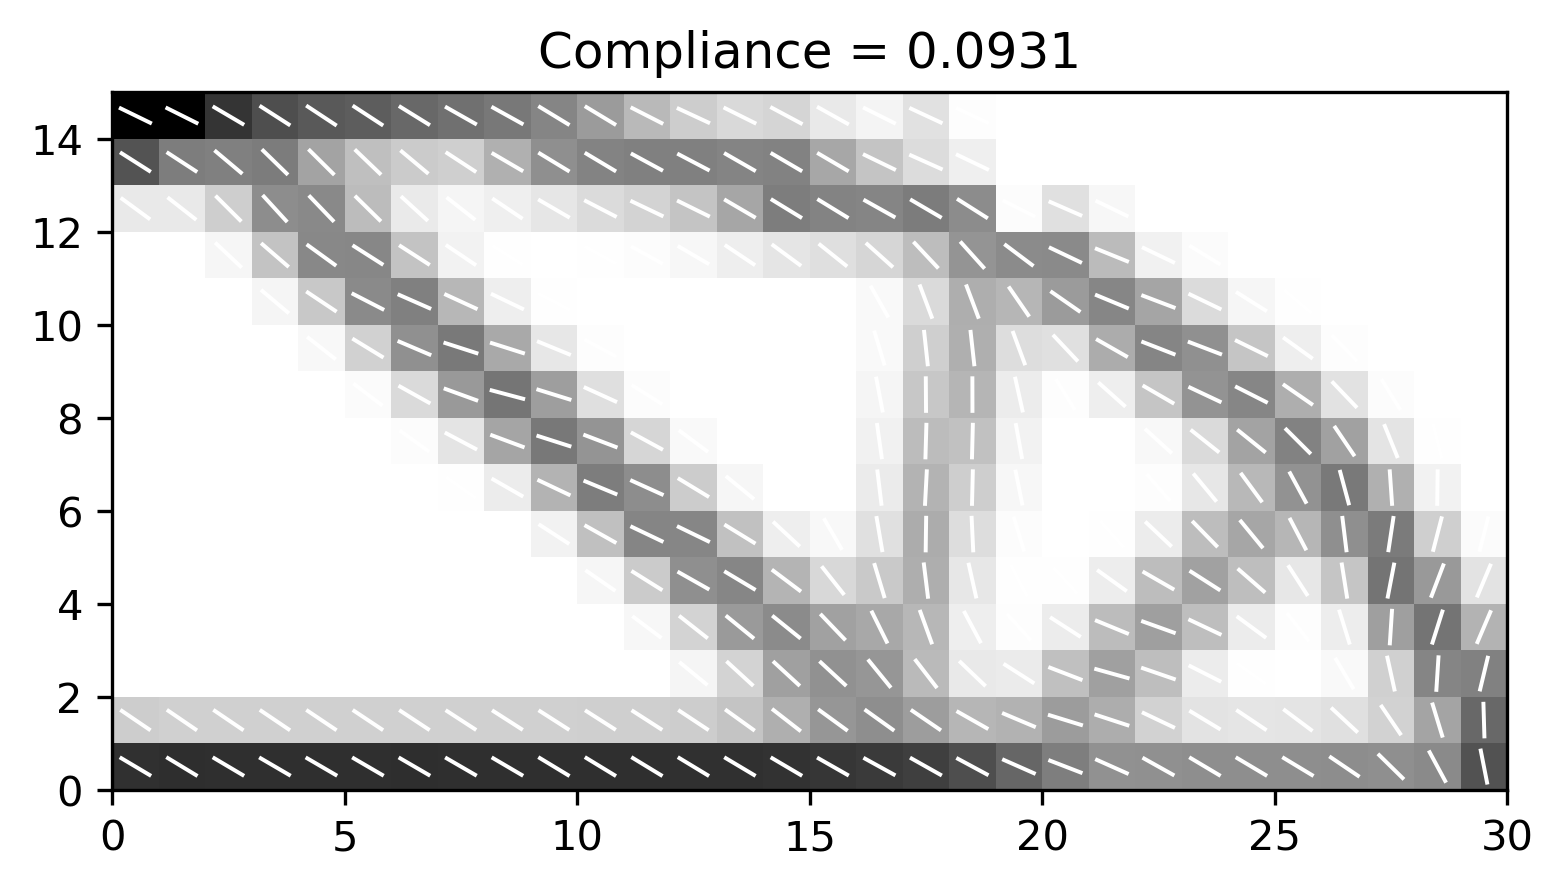

In [20]:
post5 = PostProcessor(solver5)
post5.plot_convergence()
post5.plot()

print('CO2 footprint: {:.2f} kgCO2'.format(1000 * post5.CO2_footprint(rho, CO2mat, CO2veh)))

# Change fiber volume fraction
- MBB 30 mm x 15 mm
- 30 x 15 mesh
- Cellulose and 0.25 bamboo
- volfrac = 0.3
- rmin = 1.5
- theta0 = -73.6°

In [21]:
Vfiber  = 0.25
Vmatrix = 1-Vfiber

Ex  = Efiber*Vfiber + Ematrix*Vmatrix
Ey  = Efiber*Ematrix / (Efiber*Vmatrix + Ematrix*Vfiber)
Gxy = Gfiber*Gmatrix / (Gfiber*Vmatrix + Gmatrix*Vfiber)
nu  = vfiber*Vfiber + vmatrix*Vmatrix
rho = rhofiber*Vfiber + rhomatrix*Vmatrix

In [22]:
solver6 = TopOpt(inputfile='mbb30_15', Ex=Ex, Ey=Ey, Gxy=Gxy, nu=nu, volfrac=0.3, rmin=1.5, theta0=-73.6)
solver6.optim()

print('\nElapsed time: {:.2f}s'.format(solver6.time))

Starting iteration   1... compliance = 0.3979
Starting iteration   2... compliance = 0.2928
Starting iteration   3... compliance = 0.2234
Starting iteration   4... compliance = 0.1888
Starting iteration   5... compliance = 0.1666
Starting iteration   6... compliance = 0.1498
Starting iteration   7... compliance = 0.1365
Starting iteration   8... compliance = 0.1241
Starting iteration   9... compliance = 0.1171
Starting iteration  10... compliance = 0.1106
Starting iteration  11... compliance = 0.0978
Starting iteration  12... compliance = 0.0944
Starting iteration  13... compliance = 0.0875
Starting iteration  14... compliance = 0.0828
Starting iteration  15... compliance = 0.0807
Starting iteration  16... compliance = 0.0779
Starting iteration  17... compliance = 0.0764
Starting iteration  18... compliance = 0.0767
Starting iteration  19... compliance = 0.0784
Starting iteration  20... compliance = 0.0729
Starting iteration  21... compliance = 0.0684
Starting iteration  22... complian

CO2 footprint: 12.22 kgCO2


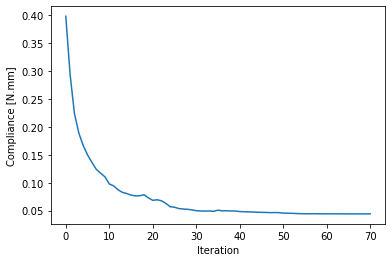

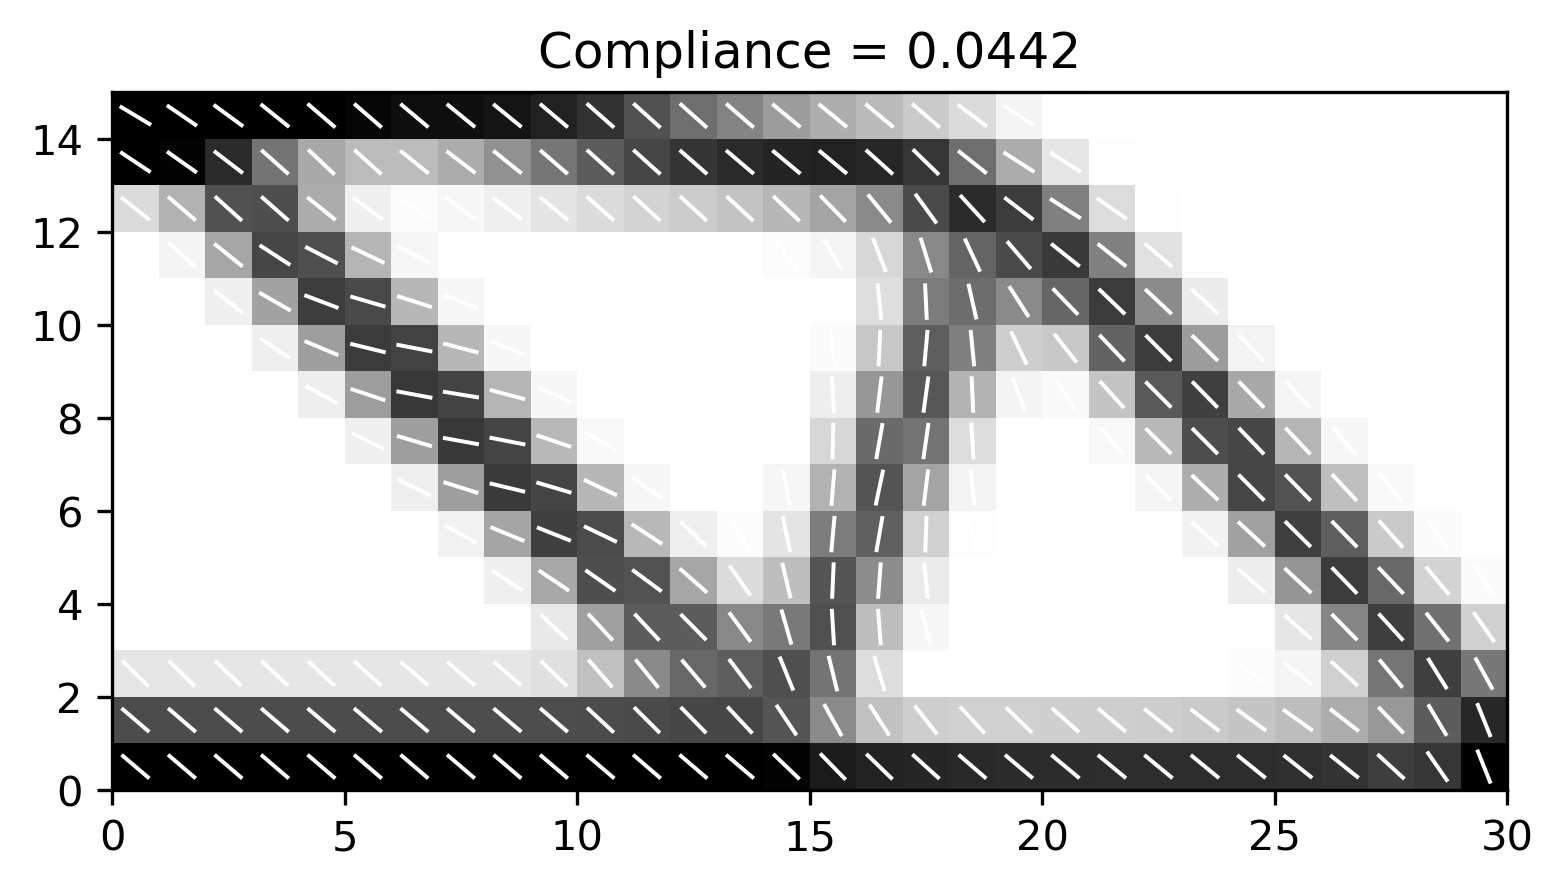

In [23]:
post6 = PostProcessor(solver6)
post6.plot_convergence()
post6.plot()

CO2mat = (rhofiber*Vfiber*CO2fiber + rhomatrix*Vmatrix*CO2matrix)/rho # kgCO2/kg
print('CO2 footprint: {:.2f} kgCO2'.format(1000 * post6.CO2_footprint(rho, CO2mat, CO2veh)))

# Change material
- MBB 30 mm x 15 mm
- 30 x 15 mesh
- Epoxy and 0.25 E-glass
- volfrac = 0.3
- rmin = 1.5
- theta0 = -73.6°

In [24]:
# fiber: E-glass
rhofiber  = 2575e-12 # t/mm^3
Efiber    = 78.5e3 # MPa
vfiber    = 0.22
CO2fiber  = 2.45 # kgCO2/kg

# matrix: epoxy
rhomatrix = 1255e-12 # t/mm^3
Ematrix   = 2.41e3 # MPa
vmatrix   = 0.399
CO2matrix = 5.94 # kgCO2/kg

Vfiber  = 0.25
Vmatrix = 1-Vfiber

Gfiber  = Efiber/(2*(1+vfiber))
Gmatrix = Ematrix/(2*(1+vmatrix))

Ex  = Efiber*Vfiber + Ematrix*Vmatrix
Ey  = Efiber*Ematrix / (Efiber*Vmatrix + Ematrix*Vfiber)
Gxy = Gfiber*Gmatrix / (Gfiber*Vmatrix + Gmatrix*Vfiber)
nu  = vfiber*Vfiber + vmatrix*Vmatrix
rho = rhofiber*Vfiber + rhomatrix*Vmatrix

In [25]:
solver7 = TopOpt(inputfile='mbb30_15', Ex=Ex, Ey=Ey, Gxy=Gxy, nu=nu, volfrac=0.3, rmin=1.5, theta0=-73.6)
solver7.optim()

print('\nElapsed time: {:.2f}s'.format(solver7.time))

Starting iteration   1... compliance = 0.4641
Starting iteration   2... compliance = 0.3428
Starting iteration   3... compliance = 0.2555
Starting iteration   4... compliance = 0.2089
Starting iteration   5... compliance = 0.1770
Starting iteration   6... compliance = 0.1516
Starting iteration   7... compliance = 0.1316
Starting iteration   8... compliance = 0.1140
Starting iteration   9... compliance = 0.0963
Starting iteration  10... compliance = 0.0837
Starting iteration  11... compliance = 0.0726
Starting iteration  12... compliance = 0.0606
Starting iteration  13... compliance = 0.0600
Starting iteration  14... compliance = 0.0580
Starting iteration  15... compliance = 0.0523
Starting iteration  16... compliance = 0.0471
Starting iteration  17... compliance = 0.0428
Starting iteration  18... compliance = 0.0388
Starting iteration  19... compliance = 0.0356
Starting iteration  20... compliance = 0.0348
Starting iteration  21... compliance = 0.0337
Starting iteration  22... complian

CO2 footprint: 21.10 kgCO2


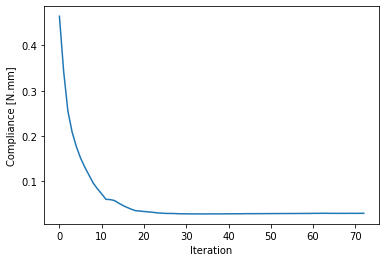

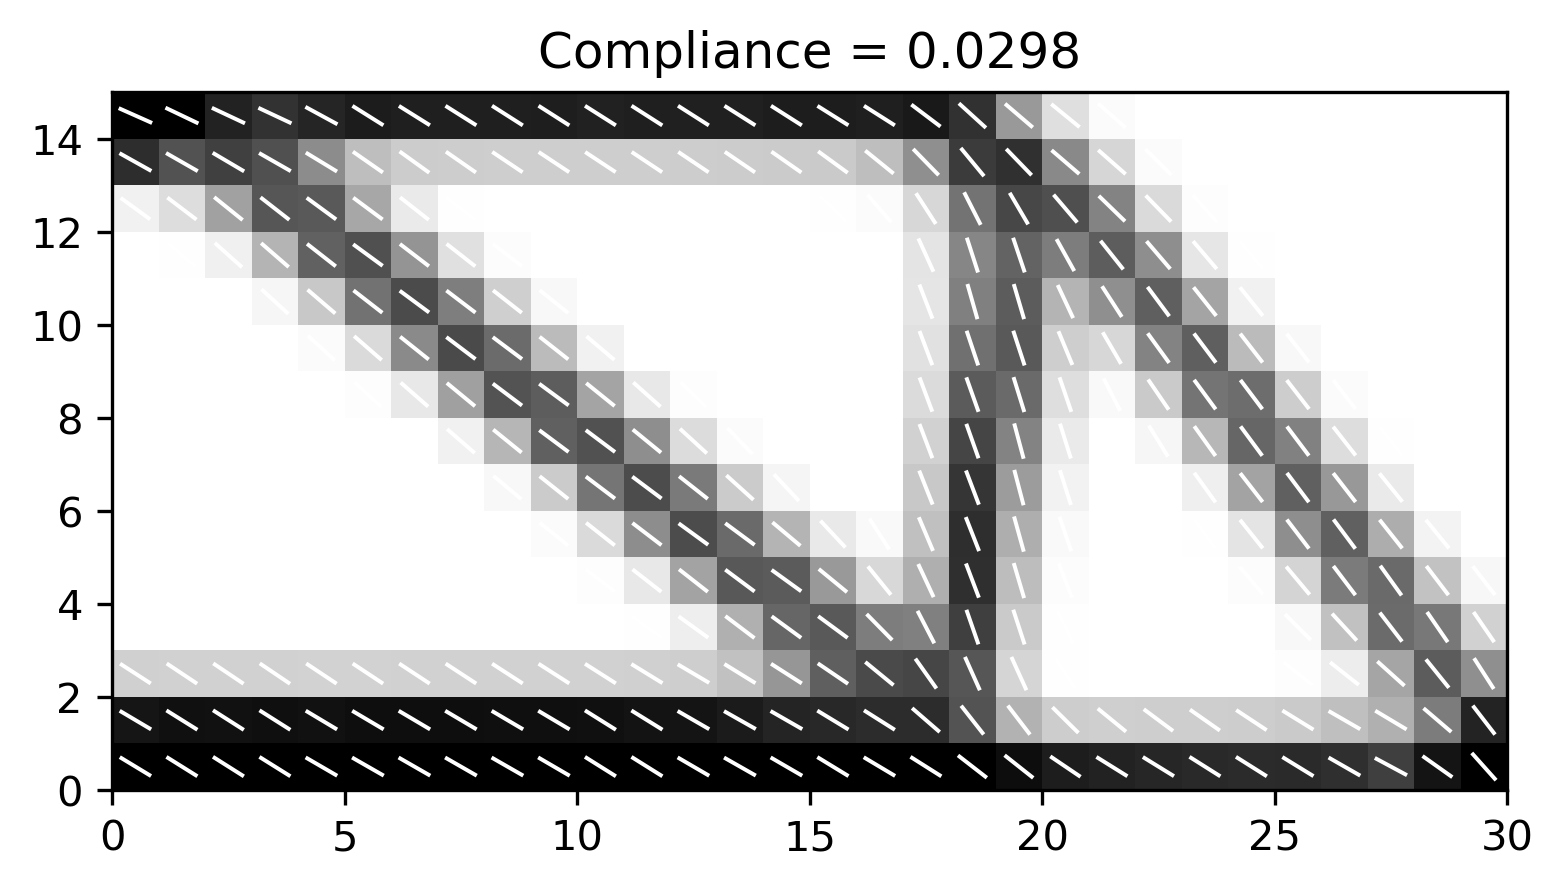

In [26]:
post7 = PostProcessor(solver7)
post7.plot_convergence()
post7.plot()

CO2mat = (rhofiber*Vfiber*CO2fiber + rhomatrix*Vmatrix*CO2matrix)/rho # kgCO2/kg
print('CO2 footprint: {:.2f} kgCO2'.format(1000 * post7.CO2_footprint(rho, CO2mat, CO2veh)))

---

In [27]:
# Clear temporary files
import os, glob
for filename in glob.glob("file*"): os.remove(filename)
for filename in glob.glob("cleanup*"): os.remove(filename)
del filename